In [1]:
import tensorflow as tf

In [2]:
from numpy import int32
a = tf.constant(5)
print(a)



tf.Tensor(5, shape=(), dtype=int32)


In [3]:
b= tf.constant(10)
c = tf.add(a, b)
print(c)

tf.Tensor(15, shape=(), dtype=int32)


In [4]:
var1= tf.Variable(20)
print(var1)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=20>


In [5]:
var2= tf.Variable([[1,2], [3,4]])
var3= tf.Variable([[5,6], [7,8]])
print(tf.matmul(var2, var3))

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


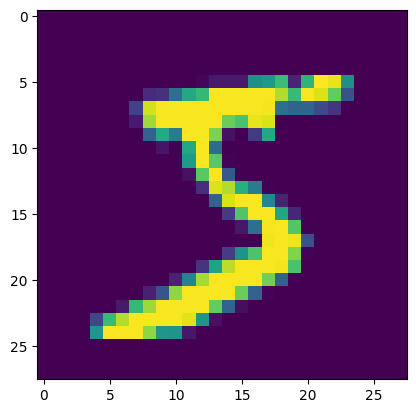

5


In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [9]:
x_train = x_train.reshape(x_train.shape[0], -1)/255.0
x_test = x_test.reshape(x_test.shape[0], -1)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(256, activation= 'relu',input_shape= (784,)))
model.add(Dense(256, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [13]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs= 10, batch_size= 1024)

Epoch 1/10
59/59 [==============================] - 3s 32ms/step - loss: 0.5841 - accuracy: 0.8451
Epoch 2/10
59/59 [==============================] - 2s 30ms/step - loss: 0.2021 - accuracy: 0.9420
Epoch 3/10
59/59 [==============================] - 2s 34ms/step - loss: 0.1468 - accuracy: 0.9578
Epoch 4/10
59/59 [==============================] - 5s 79ms/step - loss: 0.1149 - accuracy: 0.9667
Epoch 5/10
59/59 [==============================] - 3s 59ms/step - loss: 0.0906 - accuracy: 0.9732
Epoch 6/10
59/59 [==============================] - 4s 63ms/step - loss: 0.0747 - accuracy: 0.9779
Epoch 7/10
59/59 [==============================] - 4s 66ms/step - loss: 0.0615 - accuracy: 0.9820
Epoch 8/10
59/59 [==============================] - 4s 67ms/step - loss: 0.0520 - accuracy: 0.9846
Epoch 9/10
59/59 [==============================] - 4s 60ms/step - loss: 0.0435 - accuracy: 0.9871
Epoch 10/10
59/59 [==============================] - 3s 54ms/step - loss: 0.0376 - accuracy: 0.9896


In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9756


[0.07592124491930008, 0.975600004196167]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Input

In [21]:
input= Input(shape= [784, ])
hidden_1= Dense(256, activation= 'relu')(input)
hidden_2= Dense(256, activation='relu')(hidden_1)
hidden_3= Dense(256, activation= 'relu')(input)
concat= Concatenate()([hidden_2, hidden_3])
output= Dense(10, activation='softmax')(concat)
model= Model(inputs= [input], outputs= [output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 256)          200960      ['input_2[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 256)          65792       ['dense_7[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 256)          200960      ['input_2[0][0]']                
                                                                                              

In [23]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size= 512)

Epoch 1/5
118/118 [==============================] - 5s 35ms/step - loss: 0.3845 - accuracy: 0.8941
Epoch 2/5
118/118 [==============================] - 3s 26ms/step - loss: 0.1420 - accuracy: 0.9587
Epoch 3/5
118/118 [==============================] - 3s 26ms/step - loss: 0.0930 - accuracy: 0.9726
Epoch 4/5
118/118 [==============================] - 4s 35ms/step - loss: 0.0684 - accuracy: 0.9798
Epoch 5/5
118/118 [==============================] - 4s 30ms/step - loss: 0.0510 - accuracy: 0.9853


In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9776


[0.07051980495452881, 0.9775999784469604]

In [25]:
from tensorflow.keras import layers

In [26]:
class MyLayer(layers.Layer):
  def __init__(self, units, input_dim, activation):
    super(MyLayer, self).__init__()
    w_init= tf.random_normal_initializer()
    self.w= tf.Variable(initial_value= w_init(shape= (input_dim, units), dtype= 'float32'), trainable= True)
    b_init= tf.random_normal_initializer()
    self.b= tf.Variable(initial_value= b_init(shape= (units,), dtype= 'float32'), trainable= True)
    self.activation = activation
  def call(self, inputs):
    linear_op= tf.add(tf.matmul(inputs, self.w), b)
    if self.activation == 'relu':
      return tf.nn.relu(linear_op)
    elif self.activation == 'softmax':
      return tf.nn.softmax(linear_op)
